In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import root_mean_squared_error


In [2]:
with open("../DeltaDelta_BELLO/proteins_dict_esm2.pkl", "rb") as tf:
    proteins_dict = pickle.load(tf)

In [3]:
pd.read_csv('../git_JANUS_DDG/Results/Result_dataset_doppie_ludovica.csv')


,Unnamed: 0,ID,MTS,Sequence,DDG,DDG_JanusDDG
0,0,1A23A,C30S_C33S,AQYEDGKQYTTLEKPVAGAPQVLEFFSFFCPHCYQFEEVLHISDNV...,2.000,-1.439542
1,1,1ACBI,L20A_V47A,KSFPEVVGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLDLRYNRVR...,1.970,-2.769159
2,2,1ACBI,V7A_V11A,KSFPEVVGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLDLRYNRVR...,2.519,-2.029947
3,3,1ACBI,V47A_V55A,KSFPEVVGKTVDQAREYFTLHYPQYDVYFLPEGSPVTLDLRYNRVR...,2.867,-2.944304
4,4,1AG2A,D55N_M6N,GLGGYMLGSAMSRPMIHFGNDWEDRYYRENMYRYPNQVYYRPVDQY...,1.720,-1.892757
...,...,...,...,...,...,...
531,531,4LYZA,T40S_I55V,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,1.330,-1.451070
532,532,4LYZA,T40S_S91A,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,0.870,-0.715957
533,533,4LYZA,T40S_S91T,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,-0.610,-0.601924
534,534,4LYZA,T40S_S91V,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,0.530,-1.015910


In [4]:
#df_doppie = pd.read_csv('Results/Result_Megascale_D_full_seq.csv')
#df_doppie = pd.read_csv('Results/Result_cdna2_full_seq.csv')
#df_doppie = pd.read_csv('Results/Result_cdna2.csv')
#df_doppie = pd.read_csv('../git_JANUS_DDG/Results/Result_m28_test_set.csv')
df_doppie = pd.read_csv('../git_JANUS_DDG/Results/Result_dataset_doppie_ludovica.csv')
#df_doppie = pd.read_csv('../git_JANUS_DDG/Results/Result_Ptmul_NR.csv')

df_doppie = df_doppie[df_doppie['MTS'].map(lambda x: len(x.split('_'))==2)]


def distance3d(proteins_dict, id, MTS):
    pos1 = int(MTS.split('_')[0][1:-1]) -1 
    pos2 = int(MTS.split('_')[1][1:-1]) -1
    d_3d = proteins_dict[id[:-1].lower()+id[-1]]['distance_matrix'][pos1,pos2]
    return d_3d


df_doppie['Distance_3D'] = df_doppie.apply(lambda x: distance3d(proteins_dict, x['ID'],x['MTS']), axis = 1)
df_doppie['Distance_in_seq'] = df_doppie['MTS'].map(lambda x: (np.abs(int(x.split('_')[0][1:-1]) - int(x.split('_')[1][1:-1]))))


In [5]:
df_doppie['DDG']=-df_doppie['DDG']

In [6]:
type_distance = 'Distance_3D'

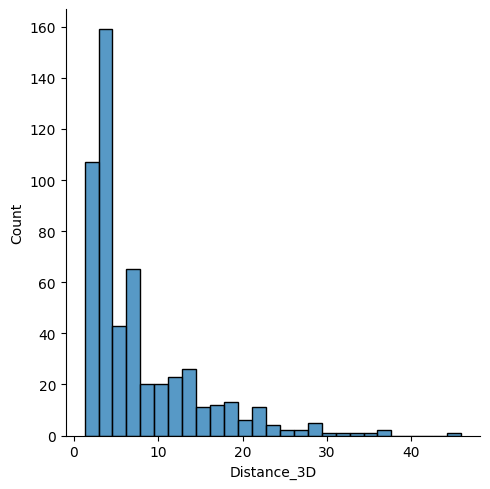

In [7]:
sns.displot(df_doppie[type_distance])

In [8]:
# w_size= 1
# # Lista per salvare i valori della rolling Pearson correlation
# pearson_rolling = []
# distance_list = []
# rmse_list = []

# # Calcolo della rolling correlation per ogni distanza d
# for d in range(5, 350):
#     df_doppie_window = df_doppie[(df_doppie['Distance_3D'] < d + w_size) & 
#                                  (df_doppie['Distance_3D'] > d - w_size)]

    
#     # # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
#     if len(df_doppie_window) > 1:
#         rmse_list.append(root_mean_squared_error(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values))

#     #     pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
#     else:
#         rmse_list.append(np.nan)

#     #     pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
#     #pearson_rolling.append(pearson_value)
#     distance_list.append(d)
# # Convertiamo in Serie Pandas per eventuali operazioni future
# #pearson_rolling = pd.Series(pearson_rolling)

# rmse_df_3d = pd.Series(rmse_list)

In [9]:
w_size= 1
# Lista per salvare i valori della rolling Pearson correlation
pearson_rolling = []
distance_list_3d = []
rmse_list = []

# Calcolo della rolling correlation per ogni distanza d
for i in range(df_doppie.shape[0]):
    df_doppie_window = df_doppie.iloc[i]

    
    # # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
    if len(df_doppie_window) > 1:
        rmse_list.append(np.abs((np.array(df_doppie_window['DDG']) - np.array(df_doppie_window['DDG_JanusDDG']))))

    #     pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
    else:
        rmse_list.append(np.nan)

    #     pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
    #pearson_rolling.append(pearson_value)
    distance_list_3d.append(df_doppie_window['Distance_3D'])
# Convertiamo in Serie Pandas per eventuali operazioni future
#pearson_rolling = pd.Series(pearson_rolling)

rmse_df_3d = pd.Series(rmse_list)

In [10]:
rmse_df_3d

0      0.560458
1      0.799159
2      0.489053
3      0.077304
4      0.172757
         ...   
531    0.121070
532    0.154043
533    1.211924
534    0.485910
535    2.881598
Length: 536, dtype: float64

In [11]:
# w_size= 1
# # Lista per salvare i valori della rolling Pearson correlation
# pearson_rolling = []
# distance_list = []
# rmse_list = []
# # Calcolo della rolling correlation per ogni distanza d
# for d in range(5, 350):
#     df_doppie_window = df_doppie[(df_doppie['Distance_in_seq'] < d + w_size) & 
#                                  (df_doppie['Distance_in_seq'] > d - w_size)]

    
#     # # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
#     if len(df_doppie_window) > 1:
#         rmse_list.append(root_mean_squared_error(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values))

#     #     pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
#     else:
#         rmse_list.append(np.nan)

#     #     pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
#     #pearson_rolling.append(pearson_value)
#     distance_list.append(d)
# # Convertiamo in Serie Pandas per eventuali operazioni future
# #pearson_rolling = pd.Series(pearson_rolling)

# rmse_df_seq = pd.Series(rmse_list)

In [12]:
# Lista per salvare i valori della rolling Pearson correlation
pearson_rolling = []
distance_list = []
rmse_list = []
# Calcolo della rolling correlation per ogni distanza d
for i in range(df_doppie.shape[0]):
    df_doppie_window_i = df_doppie.iloc[i]

    
    # # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
    if len(df_doppie_window_i) > 1:
        rmse_list.append(np.abs(np.array(df_doppie_window_i['DDG']) - np.array(df_doppie_window_i['DDG_JanusDDG'])))

    #     pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
    else:
        rmse_list.append(np.nan)

    #     pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
    #pearson_rolling.append(pearson_value)
    distance_list.append(df_doppie_window_i['Distance_in_seq'])
# Convertiamo in Serie Pandas per eventuali operazioni future
#pearson_rolling = pd.Series(pearson_rolling)

rmse_df_seq = pd.Series(rmse_list)

In [13]:
rmse_df_seq

0      0.560458
1      0.799159
2      0.489053
3      0.077304
4      0.172757
         ...   
531    0.121070
532    0.154043
533    1.211924
534    0.485910
535    2.881598
Length: 536, dtype: float64

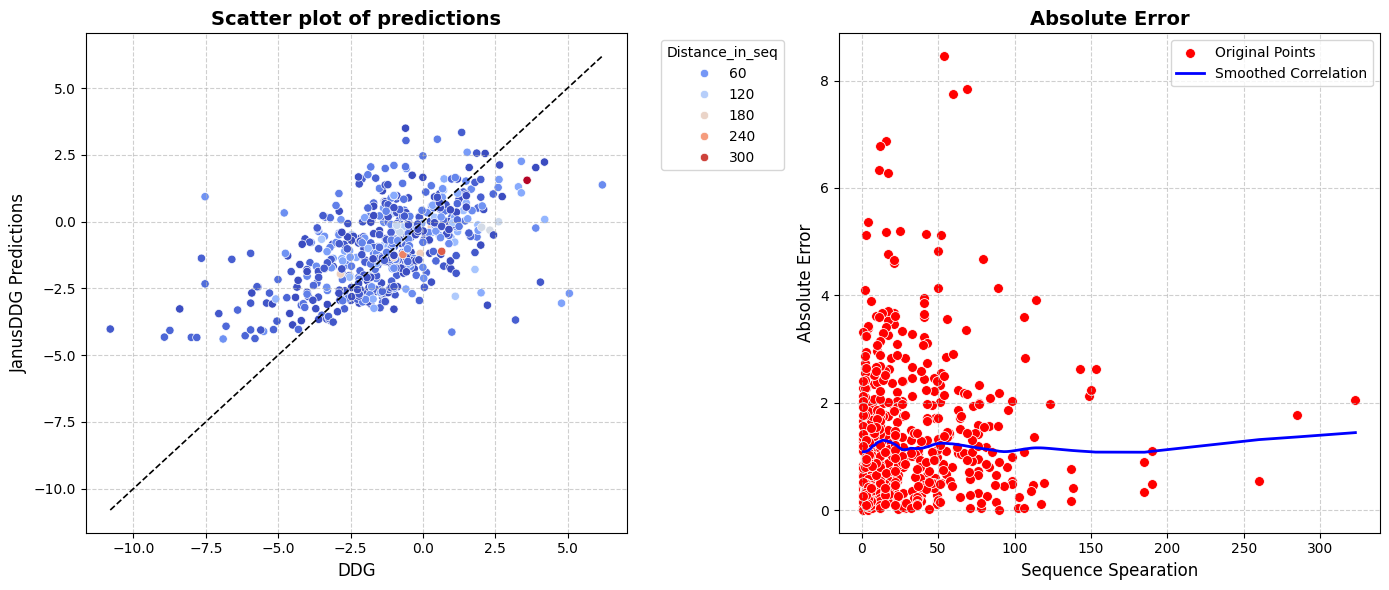

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


# Creiamo la figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### 🔹 PRIMO GRAFICO: Scatter plot con bisettrice ###
sns.scatterplot(ax=axes[0], data=df_doppie, x='DDG', y='DDG_JanusDDG', hue='Distance_in_seq', palette='coolwarm')

# Creazione della bisettrice
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 300)
axes[0].plot(x_vals, x_vals, linestyle='dashed', color='black', linewidth=1.2)

# Miglioriamo il layout
axes[0].set_xlabel("DDG", fontsize=12)
axes[0].set_ylabel("JanusDDG Predictions", fontsize=12)
axes[0].set_title("Scatter plot of predictions", fontsize=14, fontweight = 'bold')
axes[0].legend(title= "Distance_in_seq", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, linestyle= '--', alpha=0.6)

### 🔹 SECONDO GRAFICO: Rolling Pearson correlation ###
# LOWESS per smoothing
smoothed = lowess(rmse_df_seq, distance_list, frac=0.4)  # frac controlla il livello di smoothing

# Scatter plot dei punti originali
sns.scatterplot(ax=axes[1], x=distance_list, y=rmse_df_seq, color='red', s=50, label="Original Points")

# Linea smooth usando LOWESS
sns.lineplot(ax=axes[1], x=smoothed[:, 0], y=smoothed[:, 1], color='blue', linewidth=2, label="Smoothed Correlation")

# Linea media della correlazione
#axes[1].axhline(y=np.nanmean(pearson_rolling), color='green', linestyle='dashed', linewidth=1.2, label='Mean Pearson')

# Layout migliorato
axes[1].set_xlabel("Sequence Spearation", fontsize=12)
axes[1].set_ylabel("Absolute Error", fontsize=12)
axes[1].set_title("Absolute Error", fontsize=14, fontweight = 'bold')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Miglioriamo il layout generale
plt.tight_layout()
plt.show()


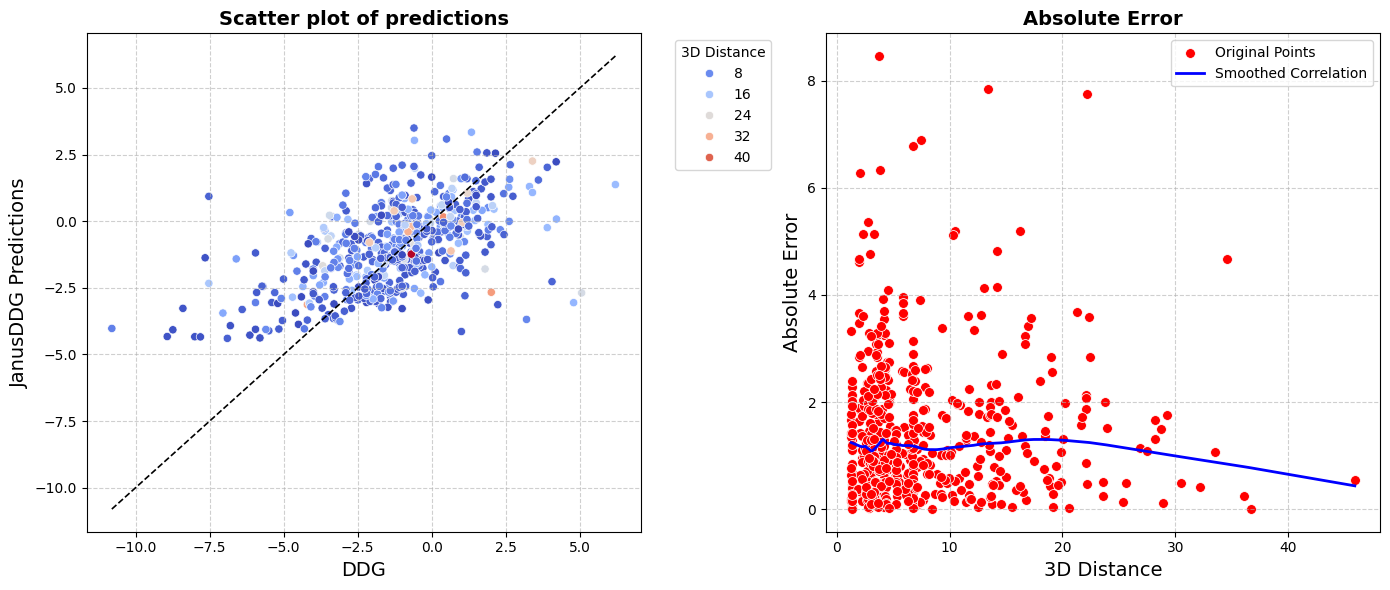

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


# Creiamo la figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### 🔹 PRIMO GRAFICO: Scatter plot con bisettrice ###
sns.scatterplot(ax=axes[0], data=df_doppie, x='DDG', y='DDG_JanusDDG', hue=type_distance, palette='coolwarm')

# Creazione della bisettrice
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 300)
axes[0].plot(x_vals, x_vals, linestyle='dashed', color='black', linewidth=1.2)

# Miglioriamo il layout
axes[0].set_xlabel("DDG", fontsize=14)
axes[0].set_ylabel("JanusDDG Predictions", fontsize=14)
axes[0].set_title("Scatter plot of predictions", fontsize=14, fontweight = 'bold')

axes[0].legend(title= "3D Distance", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, linestyle= '--', alpha=0.6)

### 🔹 SECONDO GRAFICO: Rolling Pearson correlation ###
# LOWESS per smoothing
smoothed = lowess(rmse_df_3d, distance_list_3d, frac=0.4)  # frac controlla il livello di smoothing

# Scatter plot dei punti originali
sns.scatterplot(ax=axes[1], x=distance_list_3d, y=rmse_df_3d, color='red', s=50, label="Original Points")

# Linea smooth usando LOWESS
sns.lineplot(ax=axes[1], x=smoothed[:, 0], y=smoothed[:, 1], color='blue', linewidth=2, label="Smoothed Correlation")

# Linea media della correlazione
#axes[1].axhline(y=np.nanmean(pearson_rolling), color='green', linestyle='dashed', linewidth=1.2, label='Mean Pearson')

# Layout migliorato
axes[1].set_xlabel("3D Distance", fontsize=14)
axes[1].set_ylabel("Absolute Error", fontsize=14)
axes[1].set_title("Absolute Error", fontsize=14, fontweight = 'bold')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Miglioriamo il layout generale
plt.tight_layout()
plt.show()


In [16]:
assert False

AssertionError: 

In [ ]:
# #20
# # Lista per salvare i valori della rolling Pearson correlation
# pearson_right = []
# distance_list_right = []
# # Calcolo della rolling correlation per ogni distanza d
# for d in range(1, 350):
#     df_doppie_window = df_doppie[df_doppie[type_distance] > d]
    
#     # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
#     if df_doppie_window.shape[0] > 1:
#         pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
#     else:
#         pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
#     pearson_right.append(pearson_value)
#     distance_list_right.append(d)
# # Convertiamo in Serie Pandas per eventuali operazioni future
# pearson_right = pd.Series(pearson_right)

In [ ]:


# Creiamo il grafico scatter
plt.figure(figsize=(8, 6))

df_doppie = df_doppie.sort_values(by=type_distance)

ax = sns.scatterplot(data=df_doppie, x='DDG', y='DDG_JanusDDG', hue=type_distance, palette='coolwarm')

# Aggiungiamo la bisettrice y = x
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 100)
plt.plot(x_vals, x_vals, linestyle='dashed', color='red')

# Miglioriamo il layout
plt.xlabel("DDG")
plt.ylabel("DDG_JanusDDG")
plt.legend(title="Distance in Seq", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


# Creiamo la figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### 🔹 PRIMO GRAFICO: Scatter plot con bisettrice ###
sns.scatterplot(ax=axes[0], data=df_doppie, x='DDG', y='DDG_JanusDDG', hue=type_distance, palette='coolwarm')

# Creazione della bisettrice
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 300)
axes[0].plot(x_vals, x_vals, linestyle='dashed', color='black', linewidth=1.2)

# Miglioriamo il layout
axes[0].set_xlabel("DDG", fontsize=12)
axes[0].set_ylabel("DDG_JanusDDG", fontsize=12)
axes[0].set_title("Scatter plot of predictions", fontsize=14)
axes[0].legend(title="Distance in Seq", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.6)

### 🔹 SECONDO GRAFICO: Rolling Pearson correlation ###
# LOWESS per smoothing
smoothed = lowess(pearson_rolling, distance_list, frac=0.2)  # frac controlla il livello di smoothing

# Scatter plot dei punti originali
sns.scatterplot(ax=axes[1], x=distance_list, y=pearson_rolling, color='red', s=50, label="Original Points")

# Linea smooth usando LOWESS
sns.lineplot(ax=axes[1], x=smoothed[:, 0], y=smoothed[:, 1], color='blue', linewidth=2, label="Smoothed Correlation")

# Linea media della correlazione
#axes[1].axhline(y=np.nanmean(pearson_rolling), color='green', linestyle='dashed', linewidth=1.2, label='Mean Pearson')

# Layout migliorato
axes[1].set_xlabel("Sequence Distance", fontsize=12)
axes[1].set_ylabel("Pearson Correlation", fontsize=12)
axes[1].set_title("Rolling Pearson Correlation (window size=40)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Miglioriamo il layout generale
plt.tight_layout()
plt.show()


In [ ]:
# Creiamo la figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### 🔹 PRIMO GRAFICO: Scatter plot con bisettrice ###
sns.scatterplot(ax=axes[0], data=df_doppie, x='DDG', y='DDG_JanusDDG', hue=type_distance, palette='coolwarm')

# Creazione della bisettrice
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 300)
axes[0].plot(x_vals, x_vals, linestyle='dashed', color='black', linewidth=1.2)

# Miglioriamo il layout
axes[0].set_xlabel("DDG", fontsize=12)
axes[0].set_ylabel("DDG_JanusDDG", fontsize=12)
axes[0].set_title("Scatter plot of predictions", fontsize=14)
axes[0].legend(title="Distance in Seq", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.6)

### 🔹 SECONDO GRAFICO: Rolling Pearson correlation ###
# LOWESS per smoothing
smoothed = lowess(pearson_right, distance_list_right, frac=0.2)  # frac controlla il livello di smoothing

# Scatter plot dei punti originali
sns.scatterplot(ax=axes[1], x=distance_list_right, y=pearson_right, color='red', s=50, label="Original Points")

# Linea smooth usando LOWESS
sns.lineplot(ax=axes[1], x=smoothed[:, 0], y=smoothed[:, 1], color='blue', linewidth=2, label="Smoothed Correlation")

# Linea media della correlazione
#axes[1].axhline(y=np.nanmean(pearson_rolling), color='green', linestyle='dashed', linewidth=1.2, label='Mean Pearson')

# Layout migliorato
axes[1].set_xlabel("Sequence Distance", fontsize=12)
axes[1].set_ylabel("Pearson Correlation", fontsize=12)
axes[1].set_title("Pearson correlation with left-censored distances", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Miglioriamo il layout generale
plt.tight_layout()
plt.show()


In [ ]:
pearson_right

In [ ]:
pearson_rolling

In [ ]:
assert False

In [ ]:
df_doppie = pd.read_csv('../git_JANUS_DDG/Results/Result_s96_test_set.csv')
df_doppie['lenght'] = df_doppie['Sequence'].map(lambda x: len(x))

df_doppie

In [ ]:

pearson_l = []
l_values = []

w_size=50

# Calcolo della rolling correlation per ogni distanza d
for l in range(1, 1000):
    df_doppie_window = df_doppie[(df_doppie['lenght'] < l + w_size) & 
                                 (df_doppie['lenght'] > l - w_size)]
    
    # Controlliamo che ci siano abbastanza dati per calcolare la correlazione
    if df_doppie_window.shape[0] > 1:
        pearson_value = pearsonr(df_doppie_window['DDG'].values, df_doppie_window['DDG_JanusDDG'].values)[0]
    else:
        pearson_value = np.nan  # Se non ci sono abbastanza dati, assegniamo NaN
    
    pearson_l.append(pearson_value)
    l_values.append(l)
# Convertiamo in Serie Pandas per eventuali operazioni future
pearson_right = pd.Series(pearson_l)

In [ ]:
# Creiamo la figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

### 🔹 PRIMO GRAFICO: Scatter plot con bisettrice ###
sns.scatterplot(ax=axes[0], data=df_doppie, x='DDG', y='DDG_JanusDDG', hue='lenght', palette='coolwarm')

# Creazione della bisettrice
x_vals = np.linspace(df_doppie['DDG'].min(), df_doppie['DDG'].max(), 300)
axes[0].plot(x_vals, x_vals, linestyle='dashed', color='black', linewidth=1.2)

# Miglioriamo il layout
axes[0].set_xlabel("DDG", fontsize=12)
axes[0].set_ylabel("DDG_JanusDDG", fontsize=12)
axes[0].set_title("Scatter plot of predictions", fontsize=14)
axes[0].legend(title="Distance in Seq", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, linestyle='--', alpha=0.6)

### 🔹 SECONDO GRAFICO: Rolling Pearson correlation ###
# LOWESS per smoothing
smoothed = lowess(pearson_right, l_values, frac=0.2)  # frac controlla il livello di smoothing

# Scatter plot dei punti originali
sns.scatterplot(ax=axes[1], x=l_values, y=pearson_right, color='red', s=50, label="Original Points")

# Linea smooth usando LOWESS
sns.lineplot(ax=axes[1], x=smoothed[:, 0], y=smoothed[:, 1], color='blue', linewidth=2, label="Smoothed Correlation")

# Linea media della correlazione
#axes[1].axhline(y=np.nanmean(pearson_rolling), color='green', linestyle='dashed', linewidth=1.2, label='Mean Pearson')

# Layout migliorato
axes[1].set_xlabel("Sequence Distance", fontsize=12)
axes[1].set_ylabel("Pearson Correlation", fontsize=12)
axes[1].set_title("Pearson correlation with left-censored distances", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Miglioriamo il layout generale
plt.tight_layout()
plt.show()
